<a href="https://www.uonbi.ac.ke/"><img src="https://www.uonbi.ac.ke/sites/default/files/UoN%20Logo_0.jpg" width=200/></a>
# CCI 505: Paper III
# Eliud NGARUIYA | P52/33754/2019

#Lec: Prof. Toyne O. | Dr. L. Muchemi
## Classify Tomatoes by color tutorial

## Setup Python Environment 

The next cell sets up the dependencies in required for the notebook, run it.

In [13]:
# Setup environment
!apt-get update
!apt-get -qq install xxd
!pip install pandas numpy matplotlib
%tensorflow_version 2.x
!pip install tensorflow

Hit:1 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:2 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Get:3 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Hit:4 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease
Hit:5 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease
Hit:6 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease
Get:7 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [74.6 kB]
Ign:8 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Ign:9 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:10 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Hit:11 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Fetched 252 kB in 2s (155 kB/s)
Reading package lists... Done


# Upload Data

1. Open the panel on the left side of Colab by clicking on the __>__
1. Select the Files tab
1. Drag `csv` files from your computer to the tab to upload them into colab.

# Train Neural Network





## Parse and prepare the data

The next cell parses the csv files and transforms them to a format that will be used to train the full connected neural network.



TensorFlow version = 2.3.0

tomato_green class will be output 0 of the classifier
143 samples captured for training with inputs ['Red', 'Green', 'Blue'] 



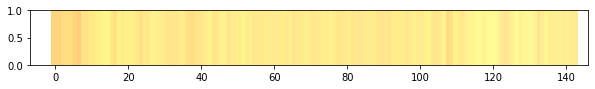

tomato_orange class will be output 1 of the classifier
280 samples captured for training with inputs ['Red', 'Green', 'Blue'] 



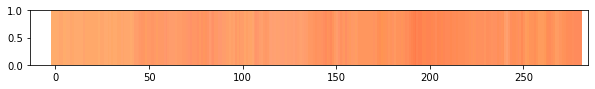

tomato_red class will be output 2 of the classifier
441 samples captured for training with inputs ['Red', 'Green', 'Blue'] 



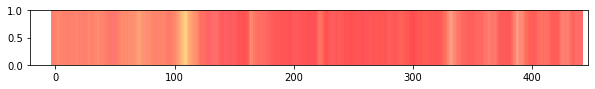

Data set parsing and preparation complete.
Data set randomization and splitting complete.


In [14]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
import os
import fileinput

print(f"TensorFlow version = {tf.__version__}\n")

# Set a fixed random seed value, for reproducibility, this will allow us to get
# the same random numbers each time the notebook is run
SEED = 1337
np.random.seed(SEED)
tf.random.set_seed(SEED)

CLASSES = [];

for file in os.listdir("/content/"):
    if file.endswith(".csv"):
        CLASSES.append(os.path.splitext(file)[0])

CLASSES.sort()

SAMPLES_WINDOW_LEN = 1
NUM_CLASSES = len(CLASSES)

# create a one-hot encoded matrix that is used in the output
ONE_HOT_ENCODED_CLASSES = np.eye(NUM_CLASSES)

inputs = []
outputs = []

# read each csv file and push an input and output
for class_index in range(NUM_CLASSES):
  objectClass = CLASSES[class_index]
  df = pd.read_csv("/content/" + objectClass + ".csv")
  columns = list(df)
  # get rid of pesky empty value lines of csv which cause NaN inputs to TensorFlow
  df = df.dropna()
  df = df.reset_index(drop=True)
   
  # calculate the number of objectClass recordings in the file
  num_recordings = int(df.shape[0] / SAMPLES_WINDOW_LEN)
  print(f"\u001b[32;4m{objectClass}\u001b[0m class will be output \u001b[32m{class_index}\u001b[0m of the classifier")
  print(f"{num_recordings} samples captured for training with inputs {list(df)} \n")

  # graphing
  plt.rcParams["figure.figsize"] = (10,1)
  pixels = np.array([df['Red'],df['Green'],df['Blue']],float)
  pixels = np.transpose(pixels)
  for i in range(num_recordings):
    plt.axvline(x=i, linewidth=8, color=tuple(pixels[i]/np.max(pixels[i], axis=0)))
  plt.show()
  
  #tensors
  output = ONE_HOT_ENCODED_CLASSES[class_index]
  for i in range(num_recordings):
    tensor = []
    row = []
    for c in columns:
      row.append(df[c][i])
    tensor += row
    inputs.append(tensor)
    outputs.append(output)

# convert the list to numpy array
inputs = np.array(inputs)
outputs = np.array(outputs)

print("Data set parsing and preparation complete.")

# Randomize the order of the inputs, so they can be evenly distributed for training, testing, and validation
# https://stackoverflow.com/a/37710486/2020087
num_inputs = len(inputs)
randomize = np.arange(num_inputs)
np.random.shuffle(randomize)

# Swap the consecutive indexes (0, 1, 2, etc) with the randomized indexes
inputs = inputs[randomize]
outputs = outputs[randomize]

# Split the recordings (group of samples) into three sets: training, testing and validation
TRAIN_SPLIT = int(0.6 * num_inputs)
TEST_SPLIT = int(0.2 * num_inputs + TRAIN_SPLIT)

inputs_train, inputs_test, inputs_validate = np.split(inputs, [TRAIN_SPLIT, TEST_SPLIT])
outputs_train, outputs_test, outputs_validate = np.split(outputs, [TRAIN_SPLIT, TEST_SPLIT])

print("Data set randomization and splitting complete.")


## Build & Train the Model

Build and train a [TensorFlow](https://www.tensorflow.org) model using the high-level [Keras](https://www.tensorflow.org/guide/keras) API.

In [15]:
# build the model and train it
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(8, activation='relu')) # relu is used for performance
model.add(tf.keras.layers.Dense(5, activation='relu'))
model.add(tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')) # softmax is used, because we only expect one class to occur per input
model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
history = model.fit(inputs_train, outputs_train, epochs=600, batch_size=4, validation_data=(inputs_validate, outputs_validate))



Epoch 1/600
130/130 [==============================] - 0s 2ms/step - loss: 0.2073 - mae: 0.4255 - val_loss: 0.1969 - val_mae: 0.4119
Epoch 2/600
130/130 [==============================] - 0s 1ms/step - loss: 0.2009 - mae: 0.4111 - val_loss: 0.1914 - val_mae: 0.4018
Epoch 3/600
130/130 [==============================] - 0s 1ms/step - loss: 0.1983 - mae: 0.4064 - val_loss: 0.1872 - val_mae: 0.3925
Epoch 4/600
130/130 [==============================] - 0s 1ms/step - loss: 0.1961 - mae: 0.4014 - val_loss: 0.1848 - val_mae: 0.3888
Epoch 5/600
130/130 [==============================] - 0s 1ms/step - loss: 0.1938 - mae: 0.3994 - val_loss: 0.1814 - val_mae: 0.3817
Epoch 6/600
130/130 [==============================] - 0s 1ms/step - loss: 0.1911 - mae: 0.3937 - val_loss: 0.1791 - val_mae: 0.3817
Epoch 7/600
130/130 [==============================] - 0s 1ms/step - loss: 0.1872 - mae: 0.3925 - val_loss: 0.1745 - val_mae: 0.3720
Epoch 8/600
130/130 [==============================] - 0s 1ms/step - 

**GRAPH THE LOSS**

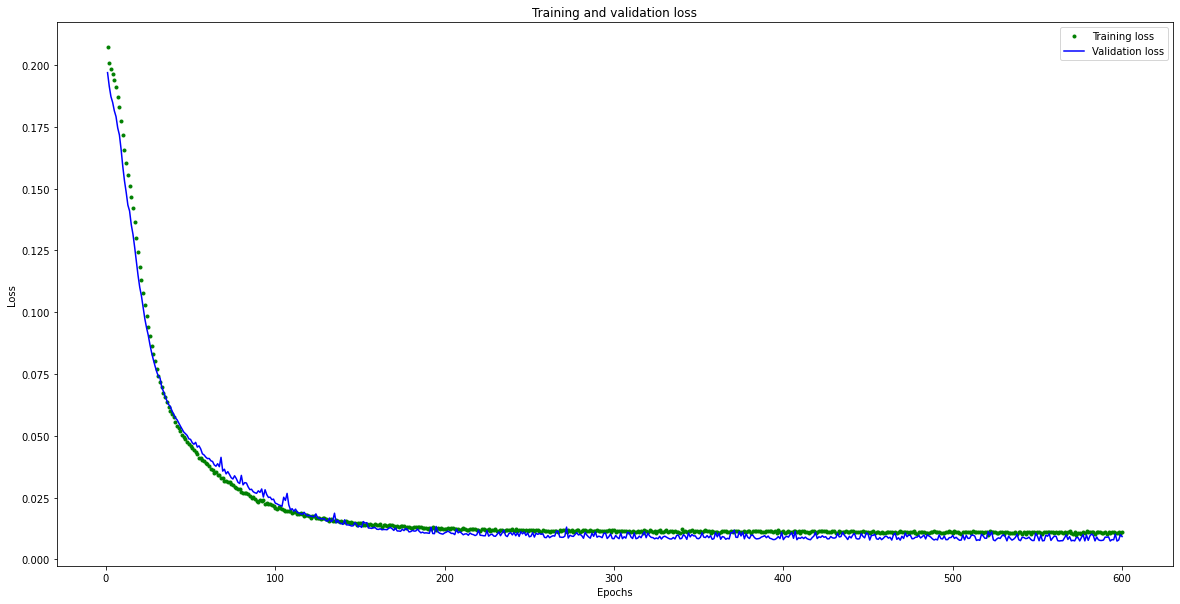

[20.0, 10.0]


In [16]:
# increase the size of the graphs. The default size is (6,4).
plt.rcParams["figure.figsize"] = (20,10)

# graph the loss, the model above is configure to use "mean squared error" as the loss function
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'g.', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

print(plt.rcParams["figure.figsize"])

###**GRAPH LOSS AGAIN ZOOMED IN**,
 skipping a bit of the start
We'll graph the same data as the previous code cell, but start at index 100 so we can further zoom in once the model starts to converge.

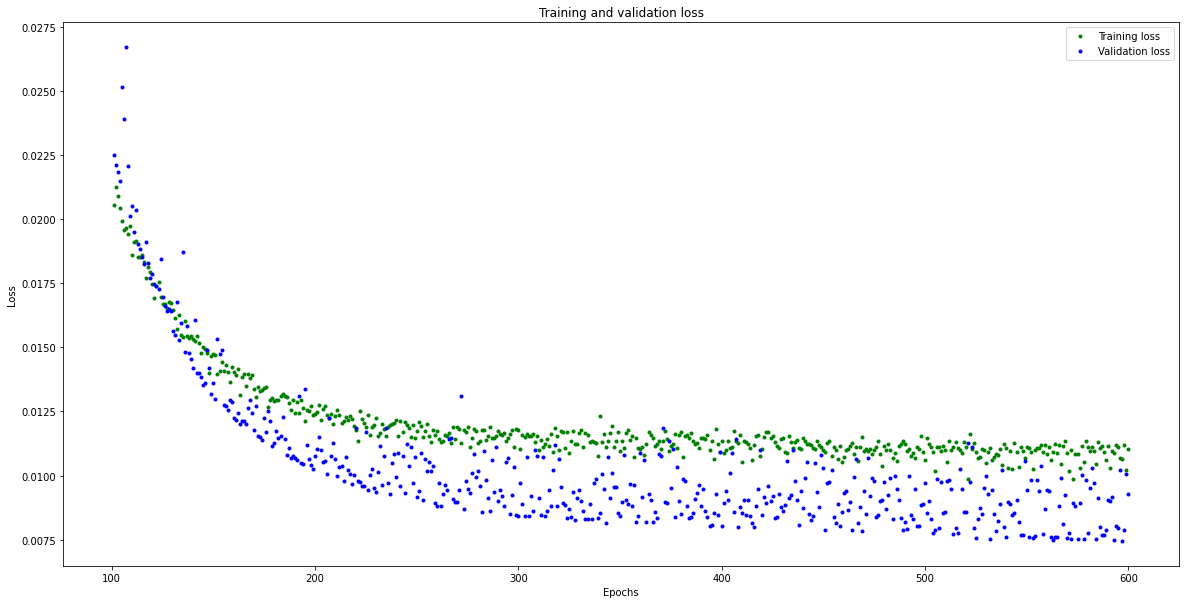

In [17]:
# graph the loss again skipping a bit of the start
SKIP = 100
plt.plot(epochs[SKIP:], loss[SKIP:], 'g.', label='Training loss')
plt.plot(epochs[SKIP:], val_loss[SKIP:], 'b.', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

###**GRAPH MEAN ABSOLUTE ERROR** 
To judge the performance of the model

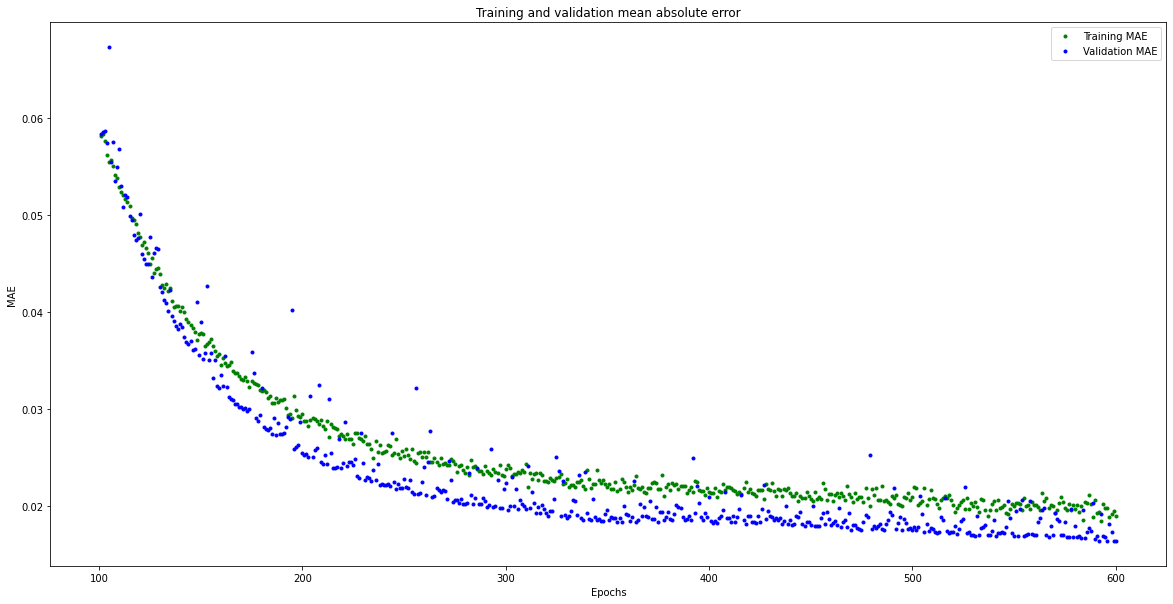

In [18]:
# graph of mean absolute error
mae = history.history['mae']
val_mae = history.history['val_mae']
plt.plot(epochs[SKIP:], mae[SKIP:], 'g.', label='Training MAE')
plt.plot(epochs[SKIP:], val_mae[SKIP:], 'b.', label='Validation MAE')
plt.title('Training and validation mean absolute error')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.show()

### **Run with Test Data**
Put our test data into the model and plot the predictions


predictions =
 [[0.    0.    1.   ]
 [0.    0.    1.   ]
 [0.    0.    1.   ]
 [0.996 0.004 0.   ]
 [0.    0.    1.   ]
 [0.993 0.007 0.   ]
 [0.    0.002 0.998]
 [0.    0.882 0.118]
 [0.    0.    1.   ]
 [0.001 0.987 0.012]
 [0.    0.    1.   ]
 [0.    0.    1.   ]
 [0.994 0.006 0.   ]
 [0.    0.982 0.018]
 [0.    0.    1.   ]
 [0.    0.    1.   ]
 [0.996 0.004 0.   ]
 [0.    0.105 0.895]
 [0.    0.    1.   ]
 [0.    0.    1.   ]
 [0.    0.    1.   ]
 [0.    0.982 0.018]
 [0.995 0.005 0.   ]
 [0.801 0.199 0.   ]
 [0.    0.    1.   ]
 [0.992 0.008 0.   ]
 [0.    0.    1.   ]
 [0.    0.    1.   ]
 [0.    0.101 0.899]
 [0.    0.    1.   ]
 [0.032 0.964 0.005]
 [0.    0.    1.   ]
 [0.001 0.983 0.016]
 [0.    0.    1.   ]
 [0.    0.976 0.024]
 [0.995 0.005 0.   ]
 [0.    0.001 0.999]
 [0.994 0.006 0.   ]
 [0.    0.961 0.039]
 [0.    0.012 0.988]
 [0.    0.001 0.999]
 [0.992 0.008 0.   ]
 [0.    0.981 0.019]
 [0.    0.804 0.196]
 [0.016 0.978 0.006]
 [0.993 0.007 0.   ]
 [0.    0.98  0.02 

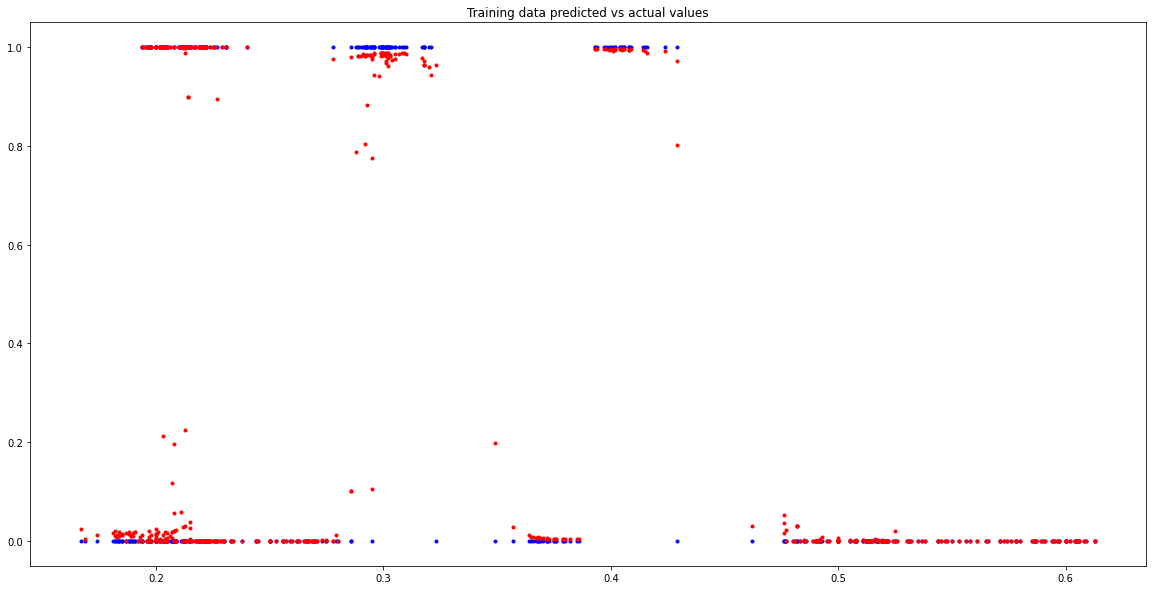

In [19]:
# use the model to predict the test inputs
predictions = model.predict(inputs_test)

# print the predictions and the expected ouputs
print("predictions =\n", np.round(predictions, decimals=3))
print("actual =\n", outputs_test)

# Plot the predictions along with to the test data
plt.clf()
plt.title('Training data predicted vs actual values')
plt.plot(inputs_test, outputs_test, 'b.', label='Actual')
plt.plot(inputs_test, predictions, 'r.', label='Predicted')
plt.show()

# Convert the Trained Model to Tensor Flow Lite

The next cell converts the model to TFlite format. The size in bytes of the model is also printed out.

In [20]:
# Convert the model to the TensorFlow Lite format without quantization
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save the model to disk
open("color_model.tflite", "wb").write(tflite_model)
  
import os
basic_model_size = os.path.getsize("color_model.tflite")
print("Model is %d bytes" % basic_model_size)
  
  

INFO:tensorflow:Assets written to: /tmp/tmphrxu_h0i/assets


INFO:tensorflow:Assets written to: /tmp/tmphrxu_h0i/assets


Model is 2096 bytes


## Encode the Model in an Arduino Header File 

The next cell creates a constant byte array that contains the TFlite model. Import it as a tab with the sketch below.

In [21]:
!echo "const unsigned char model[] = {" > /content/model.h
!cat color_model.tflite | xxd -i      >> /content/model.h
!echo "};"                              >> /content/model.h

import os
model_h_size = os.path.getsize("model.h")
print(f"Header file, model.h, is {model_h_size:,} bytes.")
print("\nOpen the side panel (refresh if needed). Double click model.h to download the file.")

Header file, model.h, is 12,960 bytes.

Open the side panel (refresh if needed). Double click model.h to download the file.


# Realtime Classification of Sensor Data on Arduino

Now it's time to switch back and run our new model on the [Arduino Nano 33 BLE Sense]